## Boosting algorithm 
### Dataset 2 (churn)

In [1]:
import nbimporter

from Helper import * 
%matplotlib inline
random_seed = 42

Importing Jupyter notebook from Helper.ipynb


In [2]:
X_train, X_test, y_train, y_test = import_dataset2()

number of training samples:  2520
number of test samples:  630


In [4]:
param_dist = {"max_depth": np.arange(3,15),
              "n_estimators": np.arange(50,500,50),
              "learning_rate": [0.1, 0.01, 0.001],
              'ccp_alpha': [0.0001, 0.001, 0.005, 0.010, 0.015, 0.020, 0.025]}


classifier = GradientBoostingClassifier()
tree_cv = RandomizedSearchCV(classifier, param_dist, cv=StratifiedKFold(5), scoring='roc_auc')

tree_cv.fit(X_train, y_train)

print('\nBest Score : %.2f'%tree_cv.best_score_, ' Best Params : ', str(tree_cv.best_params_))


Best Score : 0.97  Best Params :  {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'ccp_alpha': 0.0001}


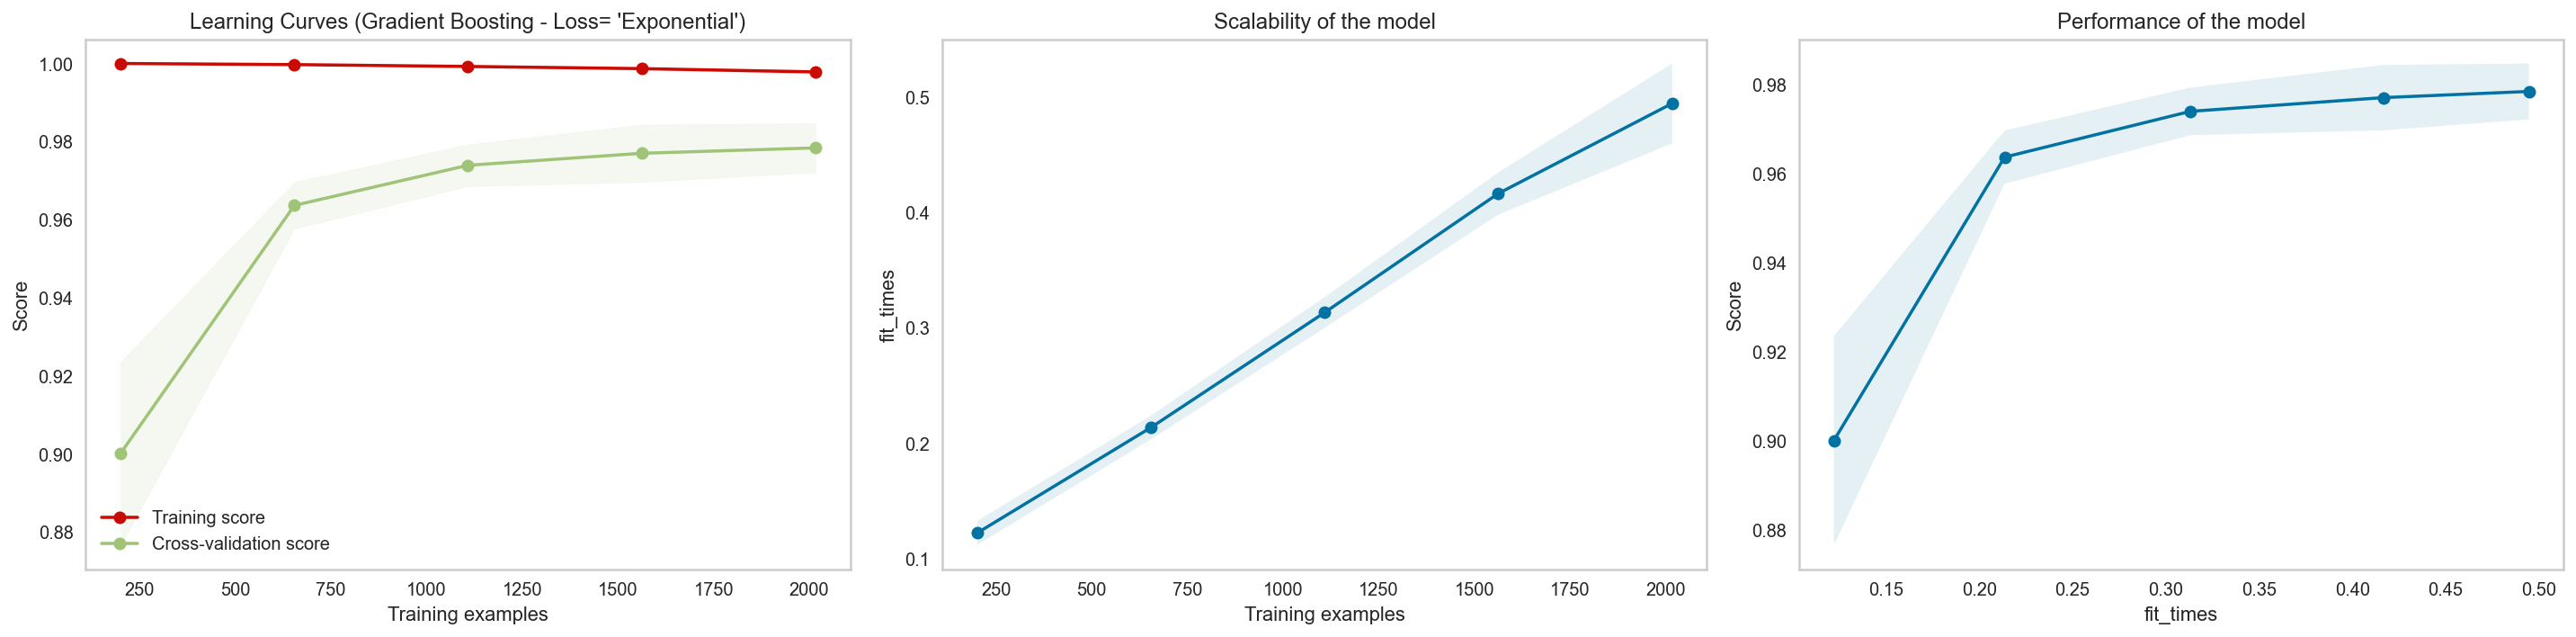

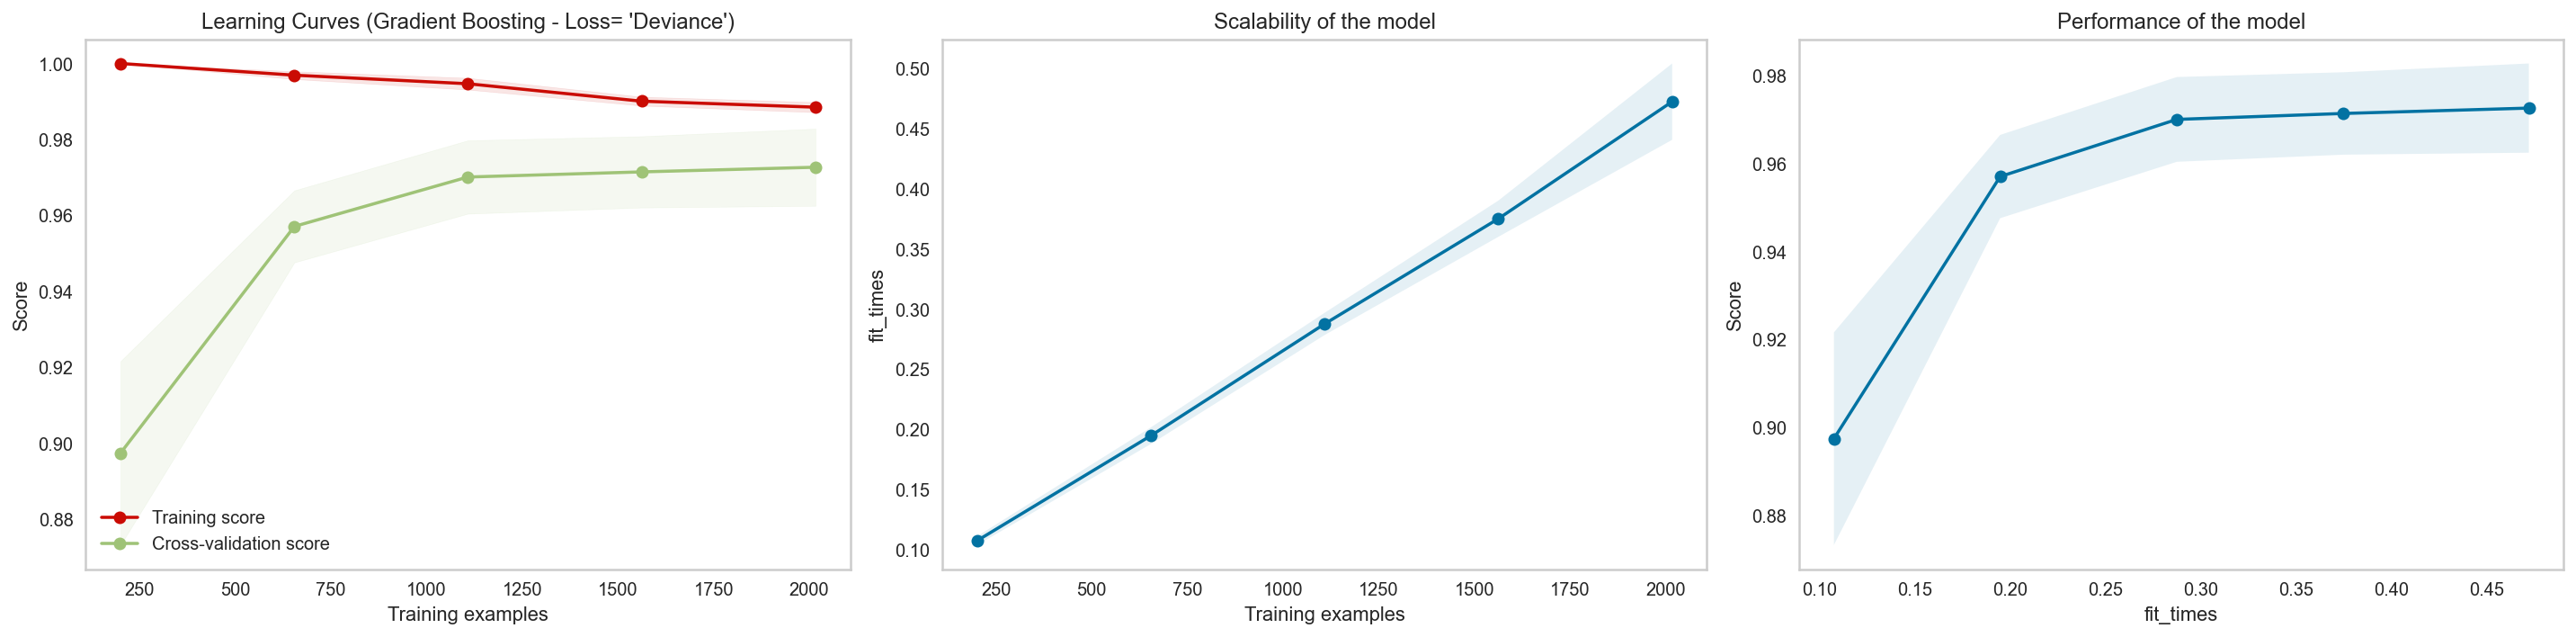

CPU times: user 17 s, sys: 164 ms, total: 17.2 s
Wall time: 16.8 s


In [5]:
%%time 

estimator = GradientBoostingClassifier(**tree_cv.best_params_, loss='exponential')
estimator1 = GradientBoostingClassifier(**tree_cv.best_params_, loss='deviance')

title = "Learning Curves (Gradient Boosting - Loss= 'Exponential')"
plot_learning_curve(estimator, title, X_train, y_train,cv=StratifiedKFold(5), n_jobs=1)

plt.tight_layout()
title = "Learning Curves (Gradient Boosting - Loss= 'Deviance')"
plot_learning_curve(estimator1, title, X_train, y_train,cv=StratifiedKFold(5), n_jobs=1)

plt.tight_layout()
plt.show()

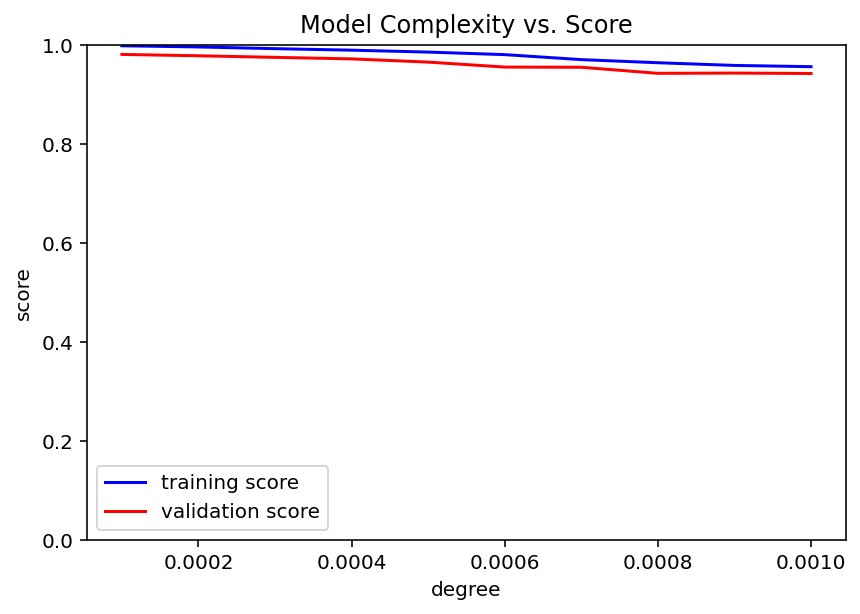

In [66]:
train_score, val_score = validation_curve(GradientBoostingClassifier(n_estimators= 250, max_depth= 6, learning_rate= 0.1), X_train, y_train, 
                                          scoring = 'roc_auc',
                                          param_name = 'ccp_alpha', 
                                          param_range = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001],
                                          cv=StratifiedKFold(5))

plt.plot(ccp_alpha, np.median(train_score, 1), color='blue', label='training score')
plt.plot(ccp_alpha, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.tight_layout()
plt.title('Model Complexity vs. Score')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [6]:
classifier = GradientBoostingClassifier(n_estimators= 250, max_depth= 6, learning_rate= 0.1, ccp_alpha = 0.0001)

In [7]:
%%time
classifier.fit(X_train, y_train)

CPU times: user 1.2 s, sys: 26 ms, total: 1.23 s
Wall time: 1.25 s


GradientBoostingClassifier(ccp_alpha=0.0001, max_depth=6, n_estimators=250)

In [8]:
%%time
y_pred = classifier.predict(X_test)

CPU times: user 2.93 ms, sys: 1.39 ms, total: 4.32 ms
Wall time: 3.71 ms


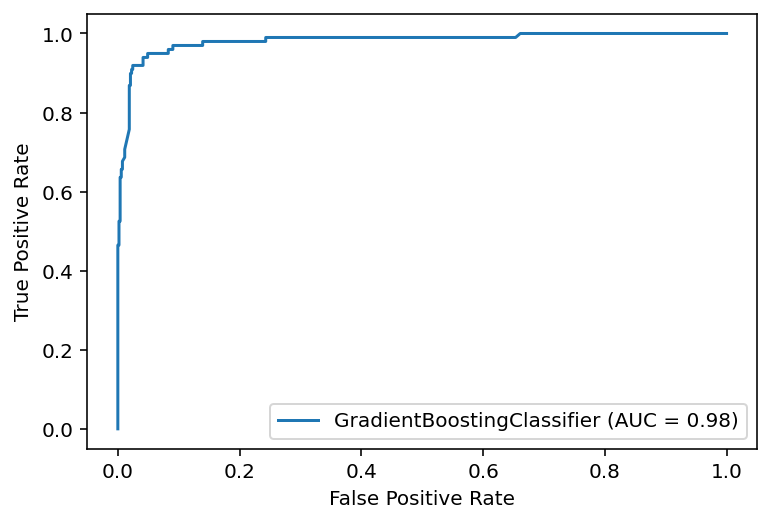

In [74]:
plot_roc_curve(classifier, X_test, y_test);

In [75]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
0,0.963031,0.981168,0.972015,531.000000
1,0.887640,0.797980,0.840426,99.000000
accuracy,0.952381,0.952381,0.952381,0.952381
macro avg,0.925336,0.889574,0.906220,630.000000
weighted avg,0.951184,0.952381,0.951337,630.000000
